# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Performing a weather check on city using a series of API calls:
# save api_keys information:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="
# Setting list for the loop call:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters for printing log:
record_count = 1
set_count = 1


# Looping through all the cities in our list and performing a request:
for i, city in enumerate(cities):
       
    # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
    # Grouping cities in sets of 50 for with counters we set for printing log:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Adding 1 to the record count for printing:
    record_count += 1

    # Running the API request for each of the cities 
    # (Using try & except)
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        
        # Suspension time to prevent api from getting locked
        time.sleep(2)
        
    # Handle exceptions for experienced error, skip the city:
    except:
        # Append null values
        print("City not found. Skipping...")
        pass 
    
# Include a print log of each city as it'sbeing processed (with the city number and city name)              
# Print when data loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ugoofaaru
Processing Record 2 of Set 1 | ko samui
Processing Record 3 of Set 1 | xuddur
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | vilani
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | itarema
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | warmbad
Processing Record 15 of Set 1 | yuzhno-kurilsk
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | hayden
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | kaeo
Processing Reco

Processing Record 40 of Set 4 | agnibilekrou
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | egvekinot
Processing Record 43 of Set 4 | vestbygda
City not found. Skipping...
Processing Record 44 of Set 4 | port hawkesbury
Processing Record 45 of Set 4 | braganca
Processing Record 46 of Set 4 | el alto
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | key largo
Processing Record 49 of Set 4 | altay
Processing Record 0 of Set 5 | lata
Processing Record 1 of Set 5 | estreito
Processing Record 2 of Set 5 | chokurdakh
Processing Record 3 of Set 5 | hilo
Processing Record 4 of Set 5 | lavrentiya
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | tuatapere
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | evensk
Processing Record 9 of Set 5 | nouadhibou
Processing Record 10 of Set 5 | fevralsk
City not found. Skipping...
Processing Record 11 of Set 5 | amuntai
Processing Record 12 of Set 5 | pacific grove
Process

Processing Record 28 of Set 8 | longyearbyen
Processing Record 29 of Set 8 | susangerd
Processing Record 30 of Set 8 | pangoa
Processing Record 31 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 32 of Set 8 | jaffna
Processing Record 33 of Set 8 | elk point
Processing Record 34 of Set 8 | kamien pomorski
Processing Record 35 of Set 8 | namatanai
Processing Record 36 of Set 8 | novooleksiyivka
Processing Record 37 of Set 8 | saint-pierre
Processing Record 38 of Set 8 | cherskiy
Processing Record 39 of Set 8 | ixtapa
Processing Record 40 of Set 8 | ambon
Processing Record 41 of Set 8 | tateyama
Processing Record 42 of Set 8 | gemona
Processing Record 43 of Set 8 | naze
Processing Record 44 of Set 8 | jiddah
City not found. Skipping...
Processing Record 45 of Set 8 | lompoc
Processing Record 46 of Set 8 | salalah
Processing Record 47 of Set 8 | cesis
Processing Record 48 of Set 8 | guerrero negro
Processing Record 49 of Set 8 | kuala terengganu
Processing Record 0 of S

Processing Record 14 of Set 12 | cam ranh
Processing Record 15 of Set 12 | kununurra
Processing Record 16 of Set 12 | charala
Processing Record 17 of Set 12 | skovde
City not found. Skipping...
Processing Record 18 of Set 12 | abha
Processing Record 19 of Set 12 | pangnirtung
Processing Record 20 of Set 12 | cabedelo
Processing Record 21 of Set 12 | gbadolite
Processing Record 22 of Set 12 | semey
Processing Record 23 of Set 12 | mangaluru
Processing Record 24 of Set 12 | luena
Processing Record 25 of Set 12 | rocha
Processing Record 26 of Set 12 | muscle shoals
Processing Record 27 of Set 12 | bitung
Processing Record 28 of Set 12 | wellington
Processing Record 29 of Set 12 | princeton
Processing Record 30 of Set 12 | coruripe
Processing Record 31 of Set 12 | kargopol
Processing Record 32 of Set 12 | pochutla
Processing Record 33 of Set 12 | yar-sale
Processing Record 34 of Set 12 | kothapet
Processing Record 35 of Set 12 | bethanien
Processing Record 36 of Set 12 | maniitsoq
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_data_df)
weather_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [6]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ugoofaaru,5.6667,73.0000,81.86,76,20,8.79,MV,1638830252
1,Ko Samui,9.5357,99.9357,79.59,71,13,13.58,TH,1638830254
2,Oddur,4.1213,43.8894,71.69,78,51,9.35,SO,1638830256
3,Ushuaia,-54.8000,-68.3000,56.86,44,75,17.27,AR,1638830258
4,East London,-33.0153,27.9116,65.57,85,72,8.46,ZA,1638830261


In [8]:
# Exporting the city data to .csv file:

weather_df.to_csv("output_data/cities.csv", index=False, header=True)

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,18.549528,18.064994,52.959564,73.228675,55.762250,7.884773,1.638831e+09
std,33.258186,90.277497,28.653947,20.297299,39.135612,5.767207,3.728131e+02
min,-54.800000,-179.166700,-35.480000,11.000000,0.000000,0.000000,1.638830e+09
25%,-8.763650,-65.508800,34.995000,63.500000,13.000000,3.480000,1.638831e+09
50%,21.461200,22.400700,62.490000,78.000000,70.000000,6.780000,1.638831e+09
75%,46.459450,100.335400,75.235000,88.000000,94.500000,11.070000,1.638831e+09
max,78.218600,178.416700,94.750000,100.000000,100.000000,40.380000,1.638832e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ugoofaaru,5.6667,73.0000,81.86,76,20,8.79,MV,1638830252
1,Ko Samui,9.5357,99.9357,79.59,71,13,13.58,TH,1638830254
2,Oddur,4.1213,43.8894,71.69,78,51,9.35,SO,1638830256
3,Ushuaia,-54.8000,-68.3000,56.86,44,75,17.27,AR,1638830258
4,East London,-33.0153,27.9116,65.57,85,72,8.46,ZA,1638830261


In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] >= 100]["Humidity"].count()

9

In [15]:
filtered_df = weather_df.loc[weather_df['Humidity'] < 100]

In [16]:
# Checking the weather_df and comparing it to the filtered_df:
len(weather_df)

551

In [17]:
filtered_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,18.241900,17.159886,53.381790,72.784133,55.450185,7.932952,1.638831e+09
std,33.210645,90.210568,28.246212,20.167127,39.286665,5.788576,3.735630e+02
min,-54.800000,-179.166700,-35.480000,11.000000,0.000000,0.000000,1.638830e+09
25%,-8.886850,-65.896175,35.492500,63.000000,12.000000,3.510000,1.638831e+09
50%,21.315100,22.177350,62.835000,78.000000,69.000000,6.890000,1.638831e+09
75%,46.186325,97.484950,75.250000,87.750000,94.750000,11.070000,1.638831e+09
max,78.218600,178.416700,94.750000,99.000000,100.000000,40.380000,1.638832e+09


In [18]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df[weather_df.Humidity > 100].index
over_100

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
for x in over_100:
    clean_city_data = weather_df.drop([x])
clean_city_data   


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ugoofaaru,5.6667,73.0000,81.86,76,20,8.79,MV,1638830252
1,Ko Samui,9.5357,99.9357,79.59,71,13,13.58,TH,1638830254
2,Oddur,4.1213,43.8894,71.69,78,51,9.35,SO,1638830256
3,Ushuaia,-54.8000,-68.3000,56.86,44,75,17.27,AR,1638830258
4,East London,-33.0153,27.9116,65.57,85,72,8.46,ZA,1638830261
...,...,...,...,...,...,...,...,...,...
546,Sisimiut,66.9395,-53.6735,21.97,76,100,19.33,GL,1638831498
547,Suez,29.9737,32.5263,61.74,61,100,2.53,EG,1638831501
548,Tocopilla,-22.0920,-70.1979,68.22,73,96,10.29,CL,1638831503
549,Assiut,27.1810,31.1837,53.78,58,100,3.74,EG,1638831505


In [21]:
# Extract relevant fields from the cleaned dataframe
lat = clean_city_data .Lat
max_temp = clean_city_data ["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the clean_city_data into a csv:
clean_city_data.to_csv("output_data/cities.csv", index=False, header=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

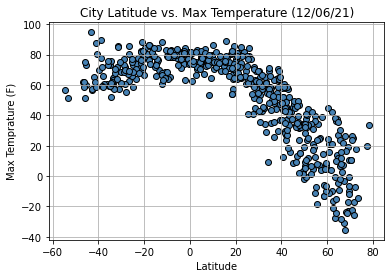

In [24]:
# Plot 1: Latitude vs. Temperature Plot
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

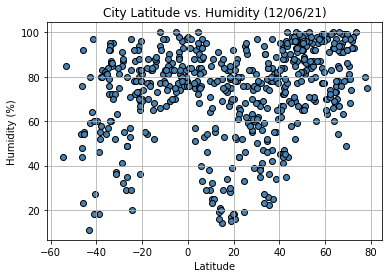

In [25]:
# Plot 2: Latitude vs. Humidity Plot
x_values = lat
y_values = humid

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

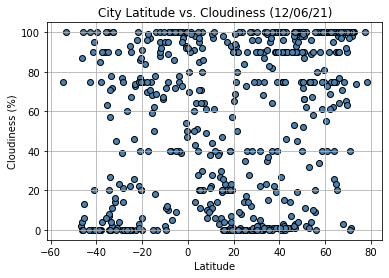

In [26]:
# Plot 3: Latitude vs. Cloudiness Plot
x_values = lat
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

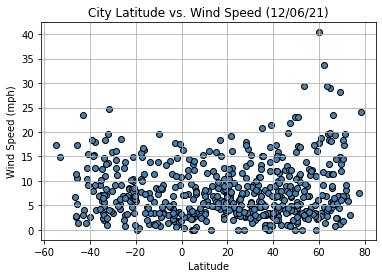

In [27]:
# Plot 4: Latitude vs. Wind Speed Plot
x_values = lat
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [28]:
# Creating northern and southern hemisphere dataframe for linear regression:

north_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 1.1399182511900992e-114
The r-value is: -0.8660879051609149


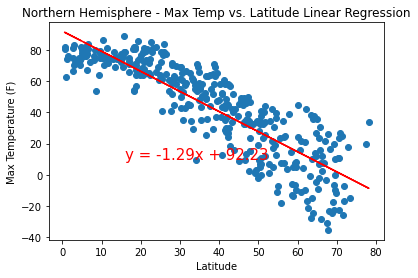

In [29]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("output_data/fig5.png")
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 1.608129852691725e-13
The r-value is: 0.5201902538949001


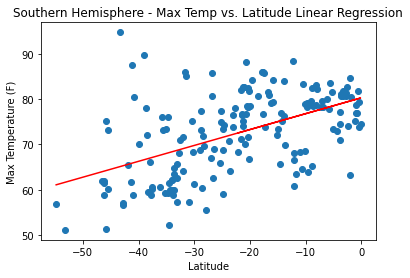

In [30]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 2: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("output_data/fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 2.583163969475033e-12
The r-value is: 0.35057978817774466


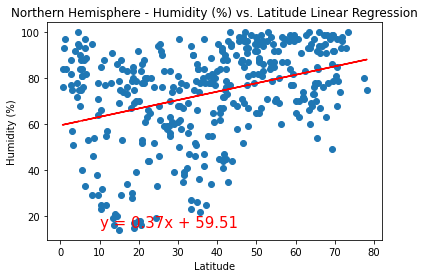

In [31]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("output_data/fig7.png")
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 2.882110430269615e-09
The r-value is: 0.42996357440853944


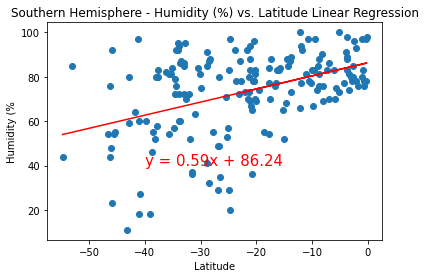

In [32]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("output_data/fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 1.8942699653321793e-10
The r-value is: 0.3208351706791743


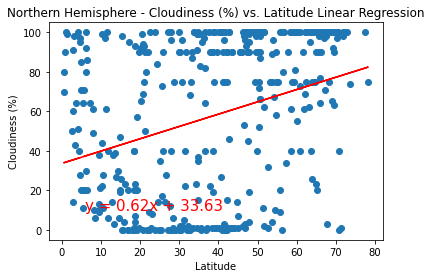

In [33]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("output_data/fig9.png")
plt.show() 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 3.145222373015452e-06
The r-value is: 0.34399798114319396


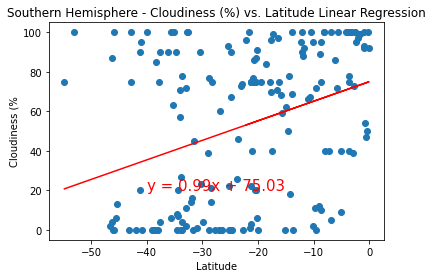

In [34]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 6: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("output_data/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 5.72006476091273e-05
The r-value is: 0.20598182436839754


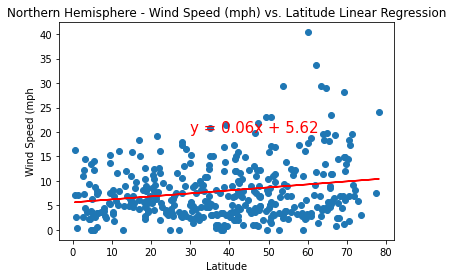

In [35]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 7: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("output_data/fig11.png")
plt.show() 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.0013165213930153772
The r-value is: -0.24096958333973958


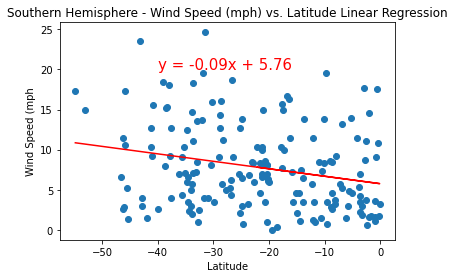

In [36]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 8: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("output_data/fig12.png")
plt.show() 